In [3]:
import numpy as np
import math
from sklearn.datasets import load_iris
from sklearn import datasets, linear_model, metrics
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

[//]: <> (1. Introduction)
<a id="1"></a>
# <div style="padding:20px;color:#ffffff;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Binning methods for Data Smoothing</b></div>

In [4]:
# Load iris dataset
dataset = load_iris()
data = dataset.data

# Extract the 1st column
column_1 = data[:, 1]

# Sort the array
sorted_column_1 = np.sort(column_1)

# Create bins and calculate bin mean, boundaries, and median
num_bins = 30
bin_width = len(sorted_column_1) // num_bins

bin_mean = np.mean(sorted_column_1.reshape(num_bins, bin_width), axis=1)
print("Bin Mean:\n", bin_mean)

bin_boundaries = np.array([sorted_column_1[i:i+bin_width][[0, -1]].mean() for i in range(0, len(sorted_column_1), bin_width)])
bin_boundaries = np.repeat(bin_boundaries, bin_width).reshape(num_bins, bin_width)
print("Bin Boundaries:\n", bin_boundaries)

bin_median = np.median(sorted_column_1.reshape(num_bins, bin_width), axis=1)
print("Bin Median:\n", bin_median)


Bin Mean:
 [2.18 2.34 2.48 2.52 2.62 2.7  2.74 2.8  2.8  2.86 2.9  2.96 3.   3.
 3.   3.   3.04 3.1  3.12 3.2  3.2  3.26 3.34 3.4  3.4  3.5  3.58 3.74
 3.82 4.12]
Bin Boundaries:
 [[2.15 2.15 2.15 2.15 2.15]
 [2.35 2.35 2.35 2.35 2.35]
 [2.45 2.45 2.45 2.45 2.45]
 [2.55 2.55 2.55 2.55 2.55]
 [2.65 2.65 2.65 2.65 2.65]
 [2.7  2.7  2.7  2.7  2.7 ]
 [2.75 2.75 2.75 2.75 2.75]
 [2.8  2.8  2.8  2.8  2.8 ]
 [2.8  2.8  2.8  2.8  2.8 ]
 [2.85 2.85 2.85 2.85 2.85]
 [2.9  2.9  2.9  2.9  2.9 ]
 [2.95 2.95 2.95 2.95 2.95]
 [3.   3.   3.   3.   3.  ]
 [3.   3.   3.   3.   3.  ]
 [3.   3.   3.   3.   3.  ]
 [3.   3.   3.   3.   3.  ]
 [3.05 3.05 3.05 3.05 3.05]
 [3.1  3.1  3.1  3.1  3.1 ]
 [3.15 3.15 3.15 3.15 3.15]
 [3.2  3.2  3.2  3.2  3.2 ]
 [3.2  3.2  3.2  3.2  3.2 ]
 [3.25 3.25 3.25 3.25 3.25]
 [3.35 3.35 3.35 3.35 3.35]
 [3.4  3.4  3.4  3.4  3.4 ]
 [3.4  3.4  3.4  3.4  3.4 ]
 [3.5  3.5  3.5  3.5  3.5 ]
 [3.55 3.55 3.55 3.55 3.55]
 [3.75 3.75 3.75 3.75 3.75]
 [3.85 3.85 3.85 3.85 3.85]
 [4.15 4

[//]: <> (1. Introduction)
<a id="1"></a>
# <div style="padding:20px;color:#ffffff;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Data Reduction</b></div>

<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00FF00; background-color: #000000;"><b>Discrete Wavelet Transform</b></h2>

In [5]:
# Reference: https://scicoding.com/introduction-to-wavelet-transform-using-python/

import numpy as np
import matplotlib.pyplot as plt
import pywt

> <span style='font-size:15px; font-family:Verdana; color: #ffffff;'><b>
Simple Signal Analyst</b></span>

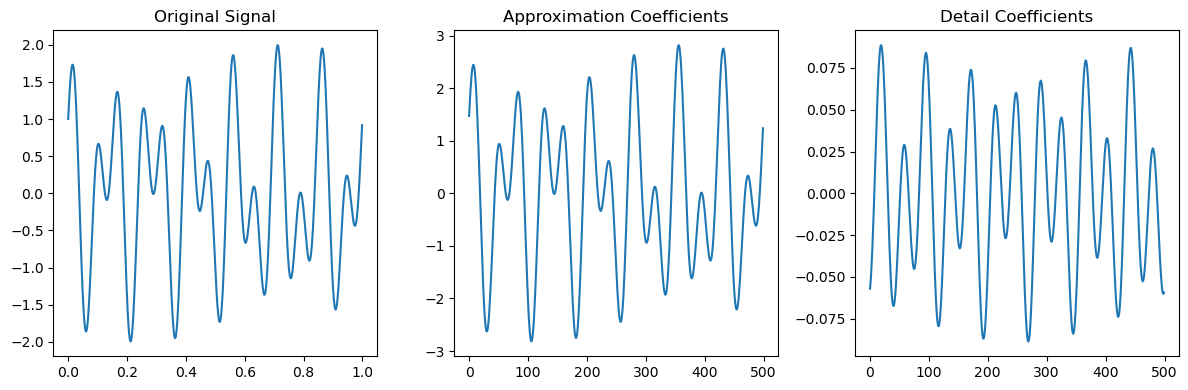

In [6]:
# Generate the signal
t = np.linspace(0, 1, 1000, endpoint=False)
signal = np.cos(2.0 * np.pi * 7 * t) + np.sin(2.0 * np.pi * 13 * t)

# Apply DWT
coeffs = pywt.dwt(signal, 'db1')
cA, cD = coeffs

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(t, signal)
plt.title("Original Signal")
plt.subplot(1, 3, 2)
plt.plot(cA)
plt.title("Approximation Coefficients")
plt.subplot(1, 3, 3)
plt.plot(cD)
plt.title("Detail Coefficients")
plt.tight_layout()
plt.show()

> <span style='font-size:15px; font-family:Verdana; color: #ffffff;'><b>
Denoising</b></span>


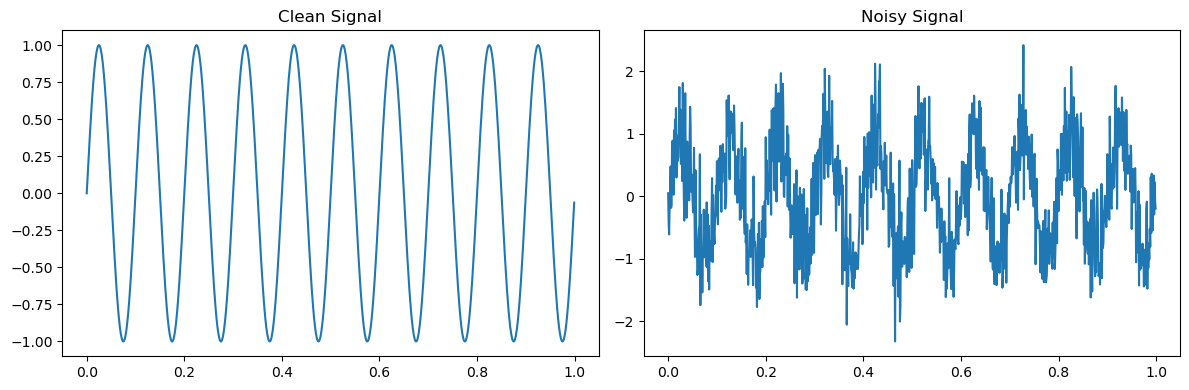

In [7]:
# Generate a simple sinusoidal signal
t = np.linspace(0, 1, 1000, endpoint=False)
clean_signal = np.sin(2.0 * np.pi * 10 * t)

# Add random noise
noise = np.random.normal(0, 0.5, clean_signal.shape)
noisy_signal = clean_signal + noise

# Plotting the clean and noisy signals
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, clean_signal)
plt.title("Clean Signal")
plt.subplot(1, 2, 2)
plt.plot(t, noisy_signal)
plt.title("Noisy Signal")
plt.tight_layout()
plt.show()

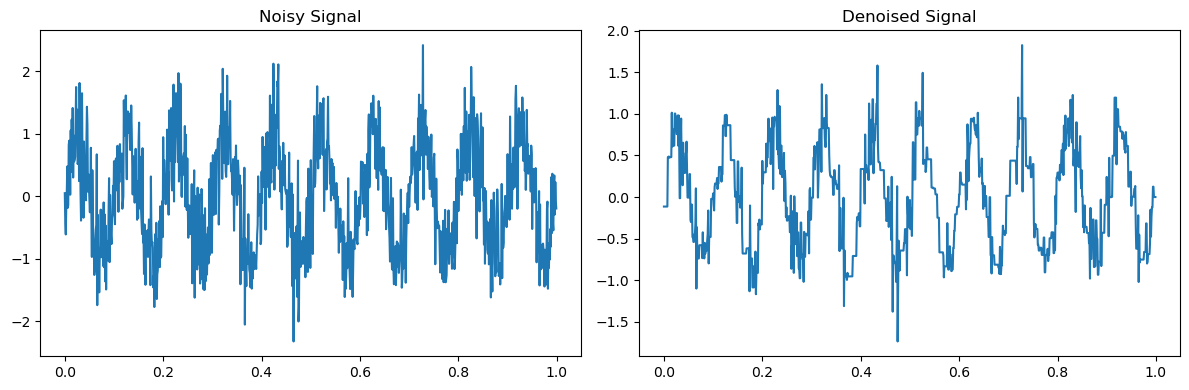

In [8]:
# Perform a multi-level wavelet decomposition
coeffs = pywt.wavedec(noisy_signal, 'db1', level=4)

# Set a threshold to nullify smaller coefficients (assumed to be noise)
threshold = 0.5
coeffs_thresholded = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]

# Reconstruct the signal from the thresholded coefficients
denoised_signal = pywt.waverec(coeffs_thresholded, 'db1')

# Plotting the noisy and denoised signals
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, noisy_signal)
plt.title("Noisy Signal")
plt.subplot(1, 2, 2)
plt.plot(t, denoised_signal)
plt.title("Denoised Signal")
plt.tight_layout()
plt.show()

> <span style='font-size:15px; font-family:Verdana; color: #ffffff;'><b>
Edge Detection</b></span>

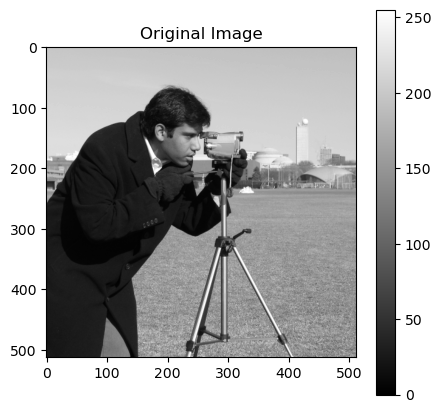

In [9]:
from skimage import data

# Use a built-in image from scikit-image as an example
img_photo = data.camera()

# Plotting the original image
plt.figure(figsize=(5, 5))
plt.imshow(img_photo, cmap='gray')
plt.title("Original Image")
plt.colorbar()
plt.show()

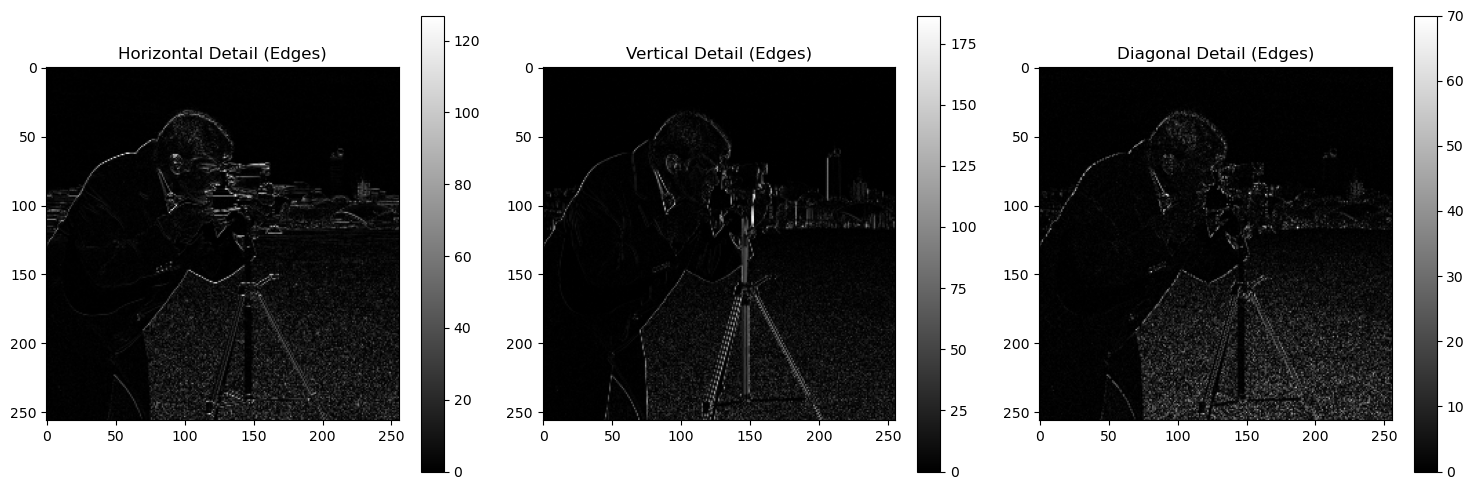

In [10]:
# Perform a 2D wavelet decomposition on the image
coeffs_photo = pywt.wavedec2(img_photo, 'db1', level=1)
cA_photo, (cH_photo, cV_photo, cD_photo) = coeffs_photo

# Plotting the detail coefficients (edges)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(np.abs(cH_photo), cmap='gray')
plt.title("Horizontal Detail (Edges)")
plt.colorbar()
plt.subplot(1, 3, 2)
plt.imshow(np.abs(cV_photo), cmap='gray')
plt.title("Vertical Detail (Edges)")
plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(np.abs(cD_photo), cmap='gray')
plt.title("Diagonal Detail (Edges)")
plt.colorbar()
plt.tight_layout()
plt.show()

<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00FF00; background-color: #000000;"><b>PCA</b></h2>

In [11]:
# importing or loading the dataset
dataset = pd.read_csv('../Data/Wine.csv')

# distributing the dataset into two components X and Y
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values


In [12]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [13]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [14]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_


In [15]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [16]:
# Predicting the test set result using 
# predict function under LogisticRegression 
y_pred = classifier.predict(X_test)

# making confusion matrix between
# test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


C:\Users\Thanh\AppData\Local\Temp\ipykernel_9856\2134477525.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


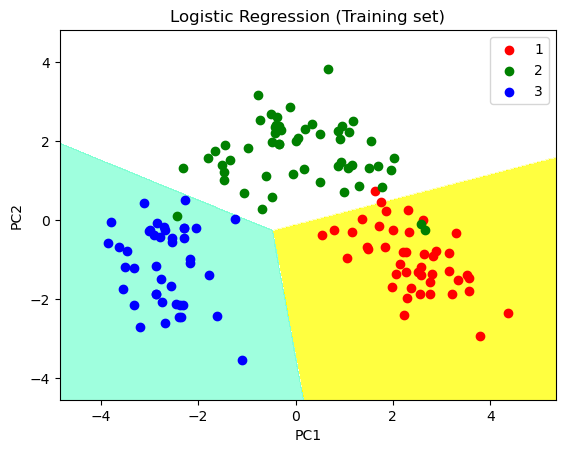

In [17]:
# Predicting the training set
# result through scatter plot 
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()


C:\Users\Thanh\AppData\Local\Temp\ipykernel_9856\730014237.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


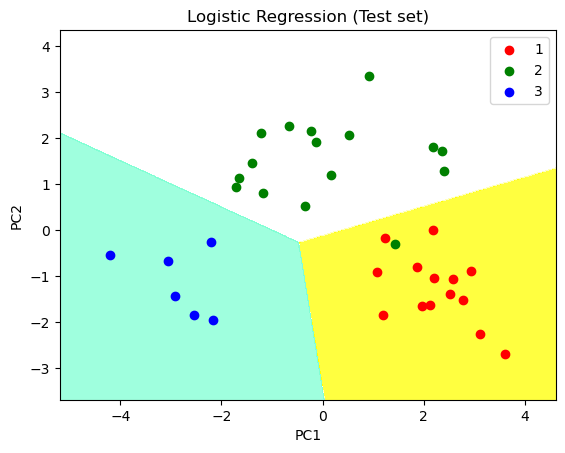

In [18]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# title for scatter plot
plt.title('Logistic Regression (Test set)') 
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()


[//]: <> (1. Introduction)
<a id="1"></a>
# <div style="padding:20px;color:#ffffff;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Data Transformation</b></div>

<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00FF00; background-color: #000000;"><b>Normalization</b></h2>

In [19]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Define your data as a numpy array
data = np.array([[-1, 2], [-0.5, 6], [0, 10], [1, 18]])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

# Print the maximum values of the original data
print("Maximum values of the original data:")
print(np.max(data, axis=0))

# Print the scaled data
print("Scaled data:")
print(scaled_data)

# Scale new data
new_data = np.array([[2, 2]])
scaled_new_data = scaler.transform(new_data)

# Print the scaled new data
print("Scaled new data:")
print(scaled_new_data)


Maximum values of the original data:
[ 1. 18.]
Scaled data:
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
Scaled new data:
[[1.5 0. ]]


In [21]:
# Loading a Sample Pandas Dataframe
import pandas as pd

df = pd.DataFrame.from_dict({
    'Name': ['Nik', 'Kate', 'Joe', 'Mitch', 'Alana'],
    'Age': [32, 30, 67, 34, 20],
    'Income': [80000, 90000, 45000, 23000, 12000],
    'Education' : [5, 7, 3, 4, 4]
})

print(df.head())

df['Income zscore'] = stats.zscore(df['Income'])
print(df.head())

    Name  Age  Income  Education
0    Nik   32   80000          5
1   Kate   30   90000          7
2    Joe   67   45000          3
3  Mitch   34   23000          4
4  Alana   20   12000          4
    Name  Age  Income  Education  Income zscore
0    Nik   32   80000          5       0.978700
1   Kate   30   90000          7       1.304934
2    Joe   67   45000          3      -0.163117
3  Mitch   34   23000          4      -0.880830
4  Alana   20   12000          4      -1.239687


In [22]:
df = df.select_dtypes(include='number').apply(stats.zscore)
print(df.head())

        Age    Income  Education  Income zscore
0 -0.288493  0.978700   0.294884       0.978700
1 -0.413925  1.304934   1.769303       1.304934
2  1.906565 -0.163117  -1.179536      -0.163117
3 -0.163061 -0.880830  -0.442326      -0.880830
4 -1.041085 -1.239687  -0.442326      -1.239687
